**Importing libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data=pd.read_csv("/content/Menu Items.csv")

In [ ]:
data.head()

,Restaurant,Section,Item,Description,Price
0,bel aire restaurant diner,cocktails must be 0 to purchase,mixed cocktail must be 0 to purchase,must be 0 to purchase choice of liquor and mix...,$7.99
1,bel aire restaurant diner,cocktails must be 0 to purchase,shots shots shots must be 0 to purchase,must be 0 to purchase choice of jose cuervo ja...,$3.99
2,bel aire restaurant diner,cocktails must be 0 to purchase,0 oz wine cup must be 0 to purchase,must be 0 to purchase specify chardonnay red b...,$5.99
3,bel aire restaurant diner,cocktails must be 0 to purchase,0 oz absolut lemonade must be 0 to purchase,must be 0 to purchase classic lemonade with a ...,$4.99
4,bel aire restaurant diner,cocktails must be 0 to purchase,0 oz peach sour must be 0 to purchase,must be 0 to purchase bushmill s whiskey muddl...,$7.99


In [ ]:
data.shape

(103610, 5)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103610 entries, 0 to 103609
Data columns (total 5 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   Restaurant   103610 non-null  object
 1   Section      103610 non-null  object
 2   Item         103605 non-null  object
 3   Description  69973 non-null   object
 4   Price        103610 non-null  object
dtypes: object(5)
memory usage: 4.0+ MB


## **Null values**

In [ ]:
data.isnull().sum()

Restaurant         0
Section            0
Item               5
Description    33637
Price              0
dtype: int64

In [ ]:
print(f"The null values percentage in description column is {(33637/data.shape[0])*100} and that of Item column is {(5/data.shape[0])*100}")

The null values percentage in description column is 32.46501302963035 and that of Item column is 0.004825789016504198


**The "Description" column contains 32.46% null values while "Item" Column contains just 0.00482% null values**

In [ ]:
data[data.Item.isnull()]

,Restaurant,Section,Item,Description,Price
2363,himalayan bistro,indian cuisine breads,NaN,leavened handmade buttered bread baked in a cl...,$3.95
80149,firehouse subs,notice,NaN,there is a national shortage of pickles depend...,$0.00
83175,priya indian cuisine,bread,NaN,semi leavened flat traditional punjabi baked b...,$2.99
85702,taste of india,breads,NaN,soft wheat flour bread baked in clay tandoor,$3.50
94464,priya indian cuisine,bread,NaN,tandoor baked flour bread,$2.25


## **Unique Values**

In [ ]:
print("Number of Unique Values")
for i in data.columns:
  print(f"{i} - {data[i].nunique()}")

Number of Unique Values
Restaurant - 500
Section - 3883
Item - 53401
Description - 39029
Price - 1432


In [ ]:
# Adding a new column
# data["count"]=1

In [ ]:
data.head()

,Restaurant,Section,Item,Description,Price
0,bel aire restaurant diner,cocktails must be 0 to purchase,mixed cocktail must be 0 to purchase,must be 0 to purchase choice of liquor and mix...,$7.99
1,bel aire restaurant diner,cocktails must be 0 to purchase,shots shots shots must be 0 to purchase,must be 0 to purchase choice of jose cuervo ja...,$3.99
2,bel aire restaurant diner,cocktails must be 0 to purchase,0 oz wine cup must be 0 to purchase,must be 0 to purchase specify chardonnay red b...,$5.99
3,bel aire restaurant diner,cocktails must be 0 to purchase,0 oz absolut lemonade must be 0 to purchase,must be 0 to purchase classic lemonade with a ...,$4.99
4,bel aire restaurant diner,cocktails must be 0 to purchase,0 oz peach sour must be 0 to purchase,must be 0 to purchase bushmill s whiskey muddl...,$7.99


In [ ]:
data[data.duplicated(subset = ['Restaurant', 'Section',"Item","Description"],keep = 'last')].shape

(12193, 5)

**We can clearly see, there are around 12000 rows which are duplicates. That means, same item at a shop has different prices**

We can't drop the duplicates because We don't know which is the actual price. So, we will take the average of all the prices for an item

Since, Description column has a lot of missing values. Also it doesn't provide any meaning. So, it's better to drop it

In [ ]:
data=data.drop(["Description"],axis=1)

In [ ]:
# Dropping all null values
data.dropna(inplace=True)

In [ ]:
# We will convert text prices to it's integer value
data['Price'] = data['Price'].str.replace('$','').astype(float)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  


In [ ]:
data.head()

,Restaurant,Section,Item,Price
0,bel aire restaurant diner,cocktails must be 0 to purchase,mixed cocktail must be 0 to purchase,7.99
1,bel aire restaurant diner,cocktails must be 0 to purchase,shots shots shots must be 0 to purchase,3.99
2,bel aire restaurant diner,cocktails must be 0 to purchase,0 oz wine cup must be 0 to purchase,5.99
3,bel aire restaurant diner,cocktails must be 0 to purchase,0 oz absolut lemonade must be 0 to purchase,4.99
4,bel aire restaurant diner,cocktails must be 0 to purchase,0 oz peach sour must be 0 to purchase,7.99


In [ ]:
data[data["Price"]<=0].shape

(163, 4)

There are around 163 rows with Prices as less than or equal to zero which ideally shouldn't be true

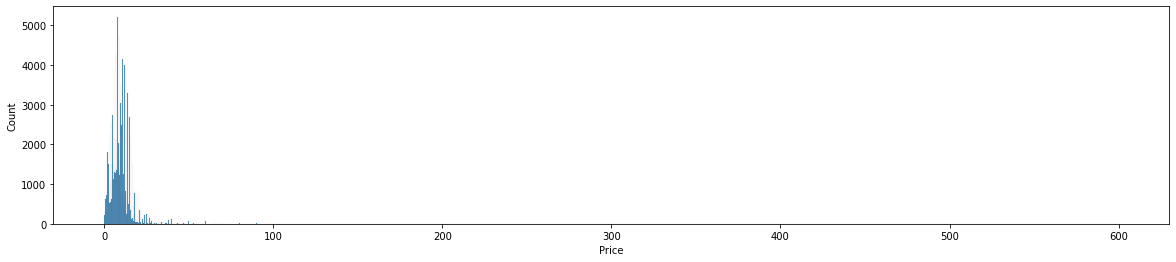

In [ ]:
sns.histplot(data=data,x="Price")

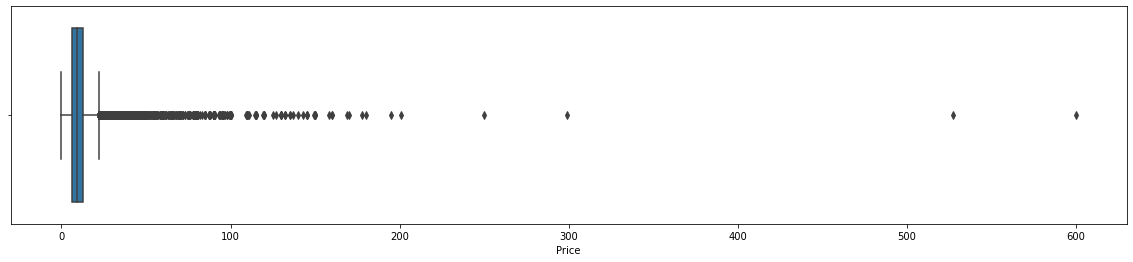

In [ ]:
sns.boxplot(x=data["Price"])

The Price column contains a lot of outliers or we can say that there are few items which has unexpected high Prices.

Since, Outliers are present. We will impute less than or equal to zero value with it's median

In [ ]:
median=np.median(data["Price"])
median

8.99

In [ ]:
data.loc[data[data["Price"]<=0].index,"Price"]=median

In [ ]:
data.head()

,Restaurant,Section,Item,Price
0,bel aire restaurant diner,cocktails must be 0 to purchase,mixed cocktail must be 0 to purchase,7.99
1,bel aire restaurant diner,cocktails must be 0 to purchase,shots shots shots must be 0 to purchase,3.99
2,bel aire restaurant diner,cocktails must be 0 to purchase,0 oz wine cup must be 0 to purchase,5.99
3,bel aire restaurant diner,cocktails must be 0 to purchase,0 oz absolut lemonade must be 0 to purchase,4.99
4,bel aire restaurant diner,cocktails must be 0 to purchase,0 oz peach sour must be 0 to purchase,7.99


In [ ]:
data.to_csv("Data.csv")

In [ ]:
df_grouped_restro=data.groupby(["Restaurant","Section","Item"]).mean()
df_grouped_restro

Price
Restaurant           Section     Item                                                 
0                    appetizers  brussels sprouts                                14.00
                                 jerk chicken skewers green tomato mango relish  13.00
                                 southern spring rolls                           12.00
                     beverages   homemade strawberry lemonade                     2.50
                                 unsweetened iced tea                             2.50
...                                                                                ...
zane japanese eatery thai entree pad se ew                                       12.95
                                 pad thai                                        12.95
                                 panang curry                                    12.95
                                 thai basil fried rice                           12.95
                                 tom yum goong ramen                             17.95

[86638 rows x 1 columns]

In [ ]:
data.head()

,Restaurant,Section,Item,Price
0,bel aire restaurant diner,cocktails must be 0 to purchase,mixed cocktail must be 0 to purchase,7.99
1,bel aire restaurant diner,cocktails must be 0 to purchase,shots shots shots must be 0 to purchase,3.99
2,bel aire restaurant diner,cocktails must be 0 to purchase,0 oz wine cup must be 0 to purchase,5.99
3,bel aire restaurant diner,cocktails must be 0 to purchase,0 oz absolut lemonade must be 0 to purchase,4.99
4,bel aire restaurant diner,cocktails must be 0 to purchase,0 oz peach sour must be 0 to purchase,7.99


In [ ]:
len(df_grouped_restro.loc[("zane japanese eatery"),"Price"])

134

In [ ]:
data_new=df_grouped_restro.reset_index()
data_new

,Restaurant,Section,Item,Price
0,0,appetizers,brussels sprouts,14.00
1,0,appetizers,jerk chicken skewers green tomato mango relish,13.00
2,0,appetizers,southern spring rolls,12.00
3,0,beverages,homemade strawberry lemonade,2.50
4,0,beverages,unsweetened iced tea,2.50
...,...,...,...,...
86633,zane japanese eatery,thai entree,pad se ew,12.95
86634,zane japanese eatery,thai entree,pad thai,12.95
86635,zane japanese eatery,thai entree,panang curry,12.95
86636,zane japanese eatery,thai entree,thai basil fried rice,12.95


In [ ]:
def top_restaurant(i):
  a=data_new[data_new["Item"]==i]
  a=a[["Restaurant","Price"]].sort_values(by="Price",ascending=False).reset_index(drop=True)
  return a

In [ ]:
top_restaurant("bottled water")

,Restaurant,Price
0,0 degrees,9.00
1,pizzeria paradiso hyattsville,4.00
2,rami s,3.25
3,sake japanese steakhouse sushi,3.00
4,mamma lucia,3.00
...,...,...
122,mandarin village chinese restaurant,1.00
123,milano pizza,1.00
124,zafran kabab palace,1.00
125,afghan kabob,0.99


In [ ]:
plt.rcParams['figure.figsize'] = [15, 7]

In [ ]:
data_new['count']=1
item=data_new.groupby(["Item"]).sum()["count"].sort_values(ascending=False)
item=pd.DataFrame(item)
item=item.reset_index()
item

,Item,count
0,french fries,163
1,caesar salad,138
2,bottled water,127
3,soda,123
4,greek salad,120
...,...,...
53396,chicken mixed vegetable dinner special,1
53397,chicken mo mo,1
53398,chicken mofongo,1
53399,chicken mole plate,1


# **Insights**

**1. Top 10 Items which are available at most number of shops**

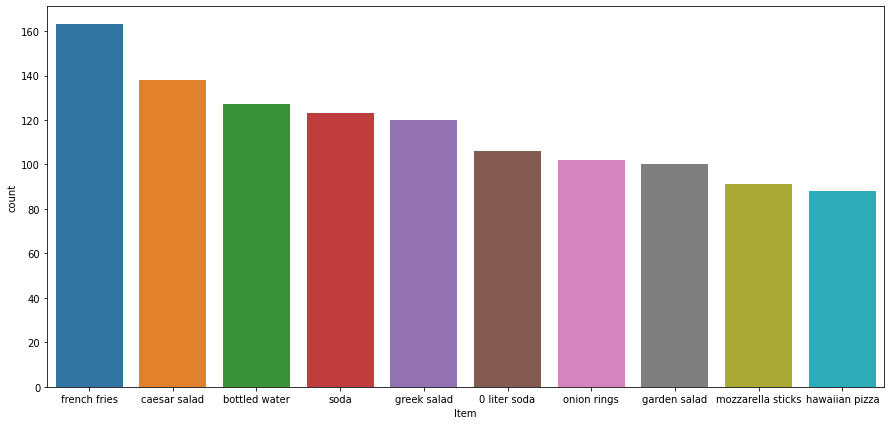

In [ ]:
sns.barplot(data=item.head(10),x="Item",y="count")
plt.title("Top 10 Items which are available at most number of shops")

**2. Number of items which are unique : i.e available at only one shop**

In [ ]:
item[item["count"]==1].Item.nunique()

44586

**3. Top 5 Prices of Top 5 most popular items**

In [ ]:
plt.rcParams['figure.figsize'] = [20, 4]

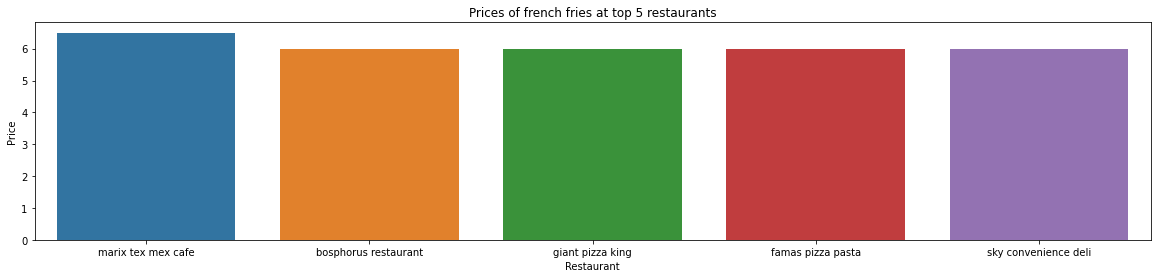

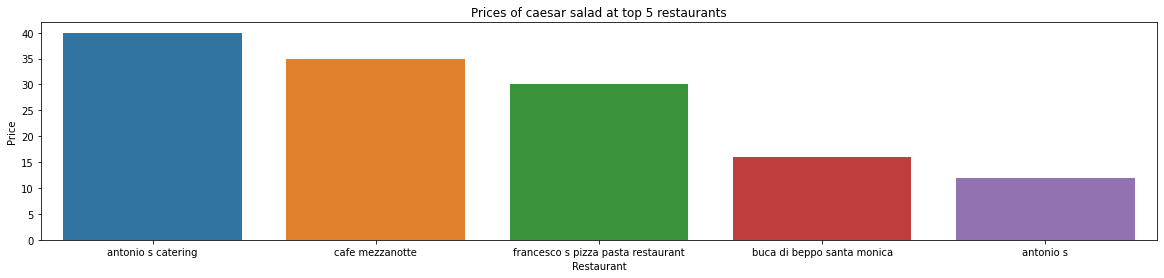

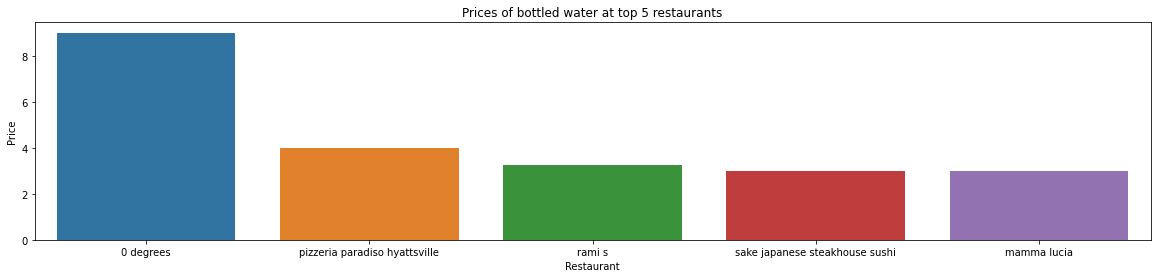

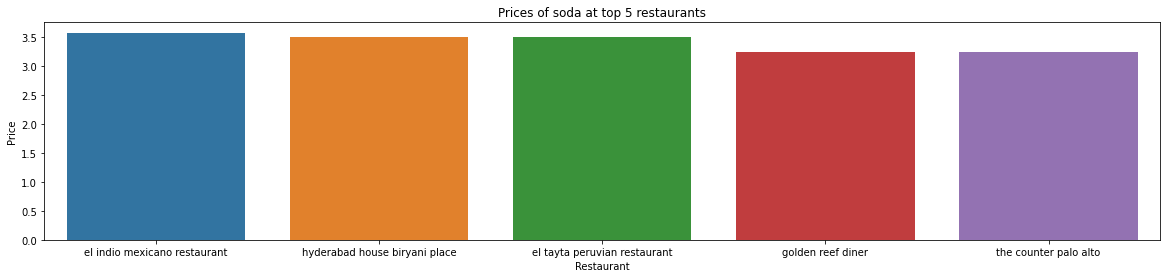

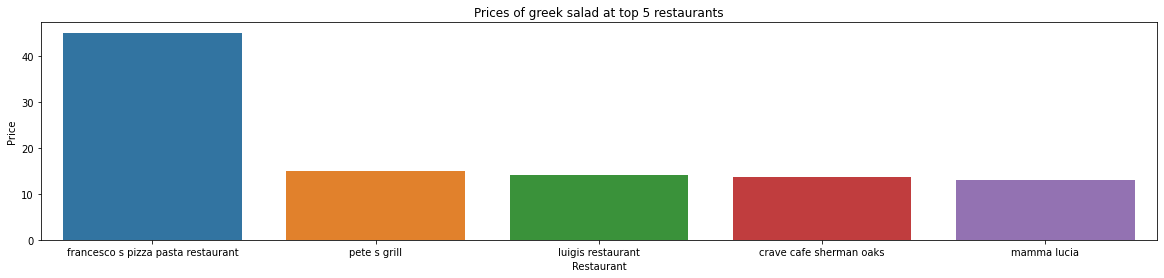

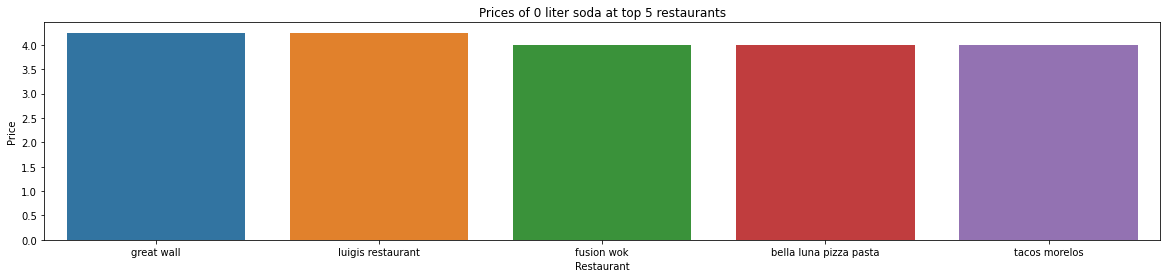

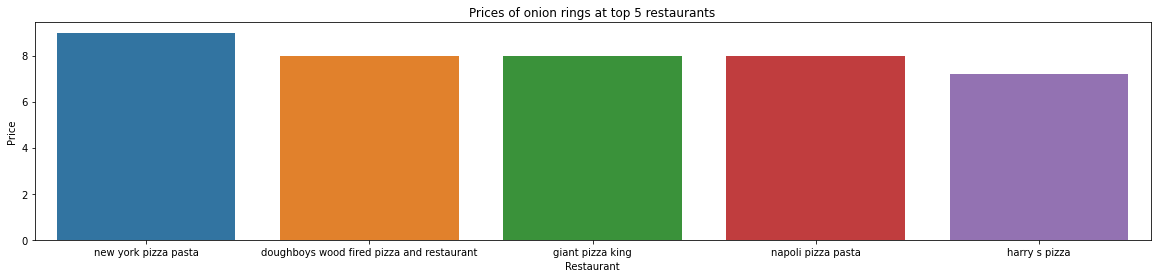

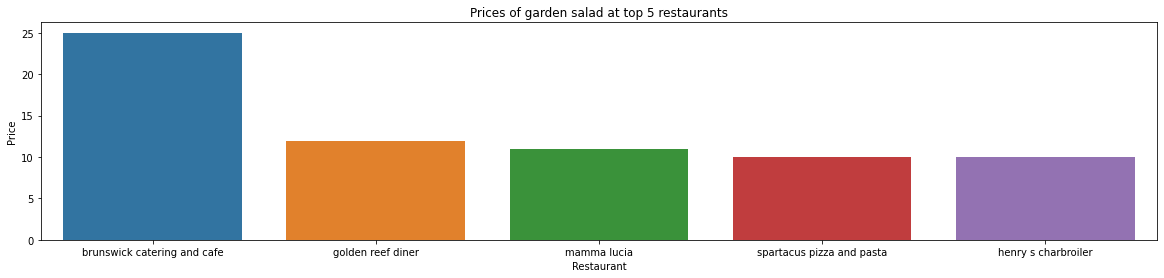

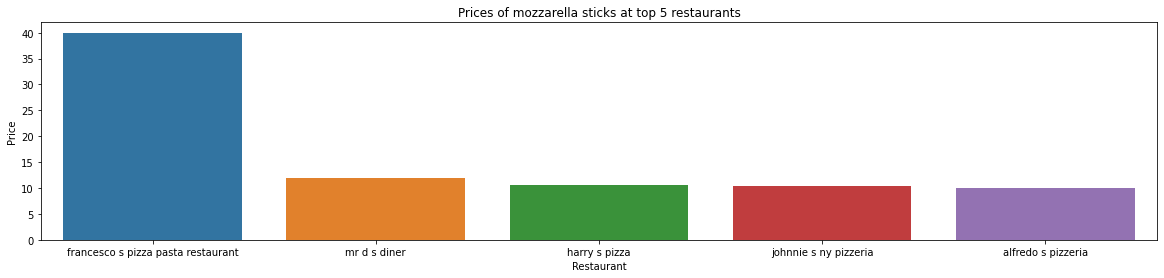

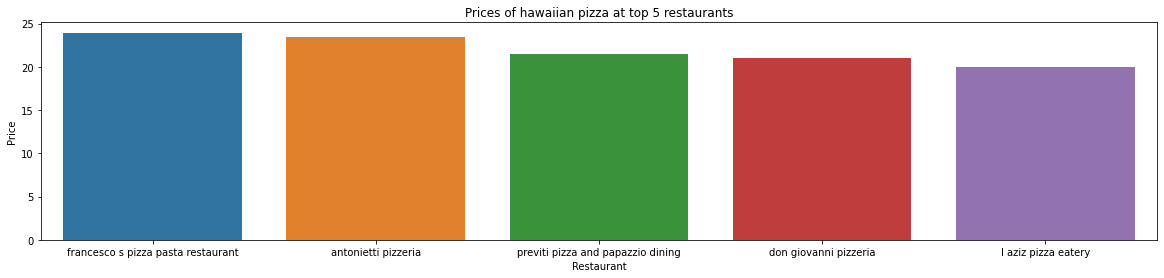

In [ ]:
for i in item.head(10).Item.values:
  sns.barplot(data=top_restaurant(i).head(5),x="Restaurant",y="Price")
  plt.title(f"Prices of {i} at top 5 restaurants")
  plt.show()

**4. Top 5 Prices of bottom 5 most popular items**

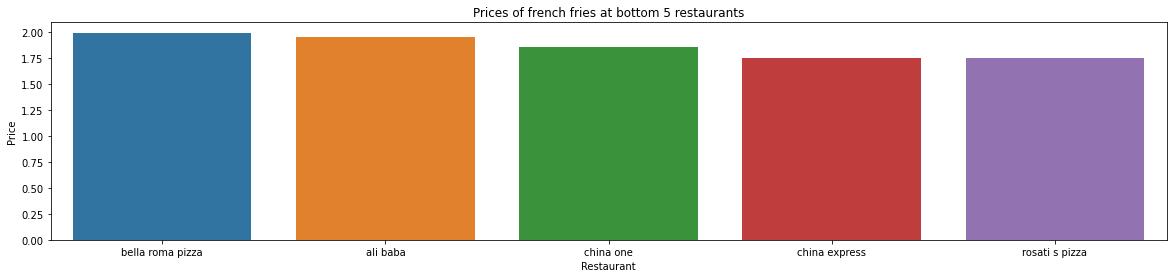

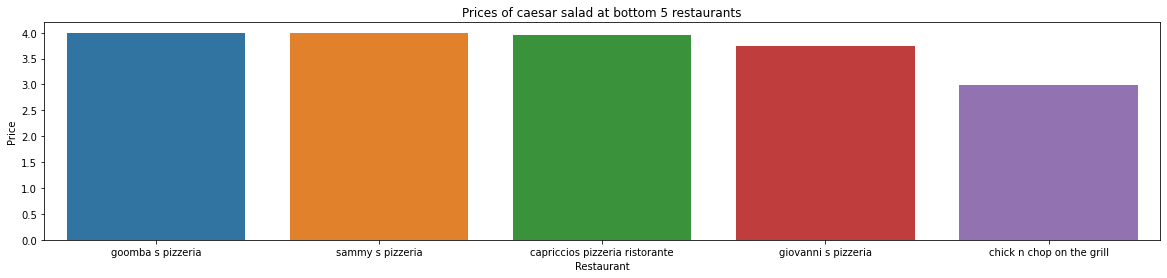

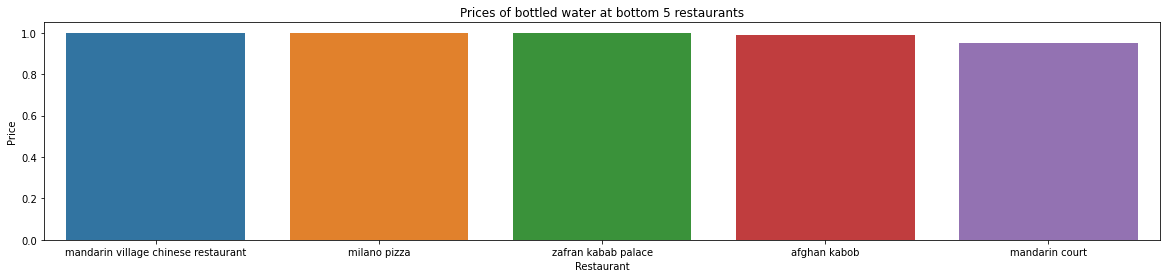

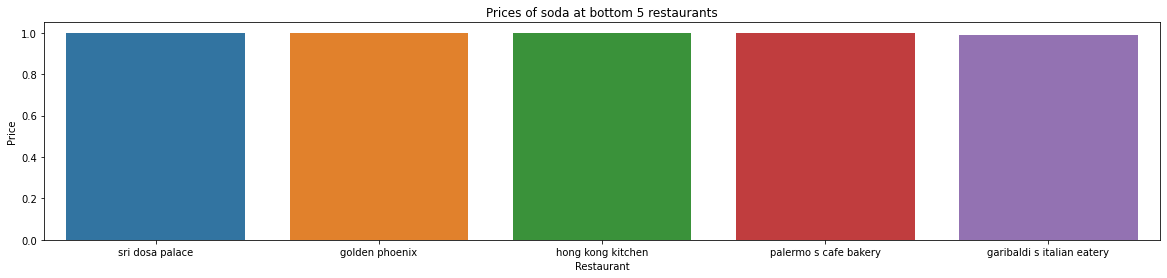

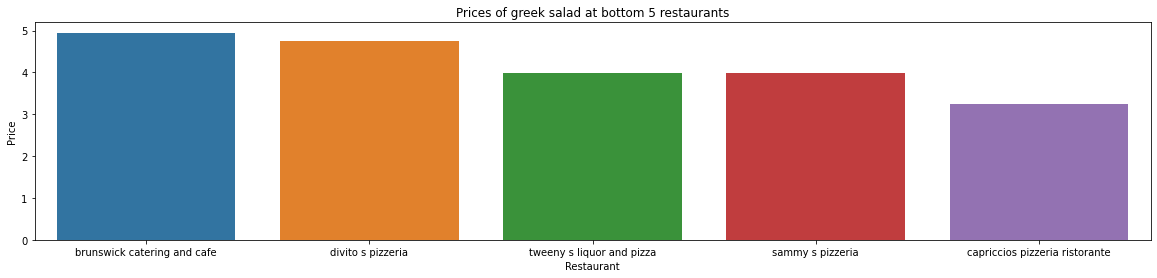

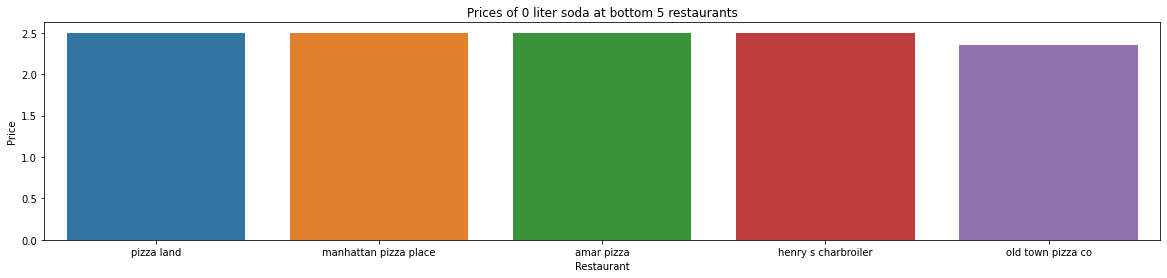

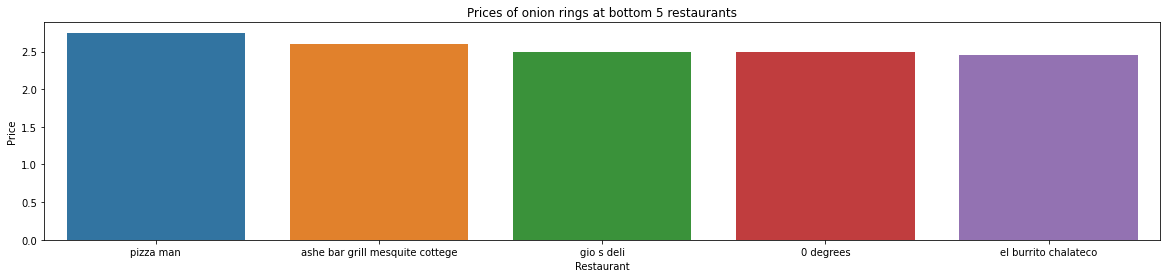

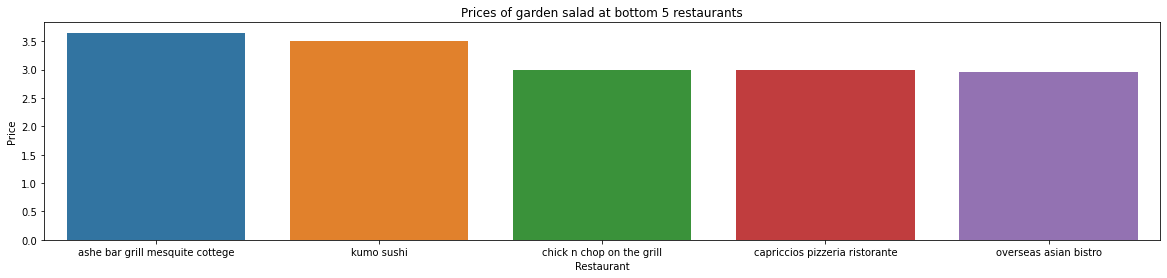

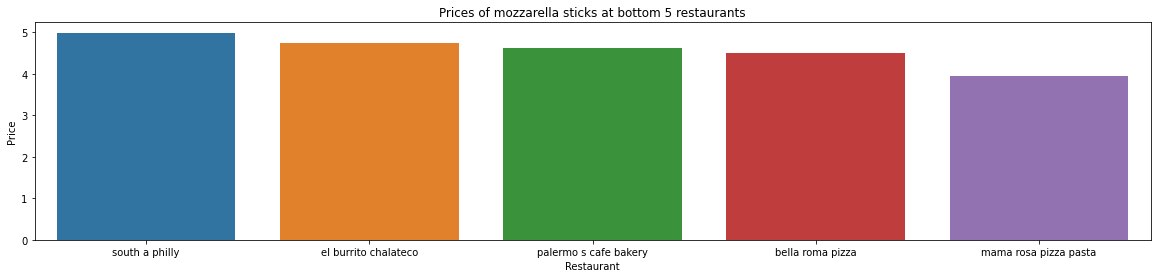

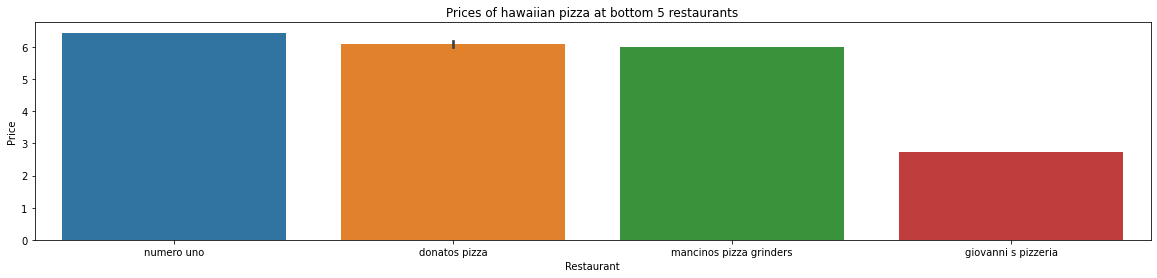

In [ ]:
for i in item.head(10).Item.values:
  sns.barplot(data=top_restaurant(i).tail(5),x="Restaurant",y="Price")
  plt.title(f"Prices of {i} at bottom 5 restaurants")
  plt.show()